<a href="https://colab.research.google.com/github/rahul4070/fake-news-detection-project/blob/main/fake_news_EDA_and_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.82 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8317/109592/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1645456693&Signature=PQjORJFmFVcSDlxE%2FGcJlYUMt60kf7BS%2BoeWyxJexgnGjGlBJHErFIqfhp2e6PZH3qgdwiPsG9MLJoW2m54XKiIC6opD6Fd%2BNe86fg44rZj0uDXgI0ZUgyKpwaSP0JKU2m%2B4BpZSW0N2t0XvS0fIdxpmizQPzrs9%2F0LOziYRWhJe2exUsImgbFA8tpqSYOt9xGtg2zBHZXcjmnmwogdOwR6PicMe11POtElWFUAOVgGsRJOguI8%2FBKdoFn0cQYXnOnSDsGRkNu2LEofzYYG14xywKySFkGthD68YMNe%2FmhClNpwPoTHEFvUEzkYzqO9LDCIfX7Rpj0YdLotPybak3A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip" -c -O 'train.csv.zip'

--2022-02-21 05:18:19--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/8317/109592/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1645456693&Signature=PQjORJFmFVcSDlxE%2FGcJlYUMt60kf7BS%2BoeWyxJexgnGjGlBJHErFIqfhp2e6PZH3qgdwiPsG9MLJoW2m54XKiIC6opD6Fd%2BNe86fg44rZj0uDXgI0ZUgyKpwaSP0JKU2m%2B4BpZSW0N2t0XvS0fIdxpmizQPzrs9%2F0LOziYRWhJe2exUsImgbFA8tpqSYOt9xGtg2zBHZXcjmnmwogdOwR6PicMe11POtElWFUAOVgGsRJOguI8%2FBKdoFn0cQYXnOnSDsGRkNu2LEofzYYG14xywKySFkGthD68YMNe%2FmhClNpwPoTHEFvUEzkYzqO9LDCIfX7Rpj0YdLotPybak3A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.124.128, 172.217.214.128, 172.253.114.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.124.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38841253 (37M) [application/zip]
Saving to: ‘train.csv.zip’

train.csv.zip       100

In [ ]:
!unzip train.csv.zip

Archive:  train.csv.zip
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from tqdm import tqdm
tqdm.pandas()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold
import joblib
from sklearn.metrics import accuracy_score
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns

# Exploratory Data Analysis

In [ ]:
df = pd.read_csv('train.csv', index_col='id')
print(df.shape)
df.head()

(20800, 4)


,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
df.label.value_counts()

1    10413
0    10387
Name: label, dtype: int64

observation: the data is balanced

In [ ]:
df.isnull().sum(axis=0)

title      558
author    1957
text        39
label        0
dtype: int64

2515 rows have nan values in them which we will try to fill them in the preprocessing step

In [ ]:
def count(x):
  try:
    return len(x.split())
  except:
    return 0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


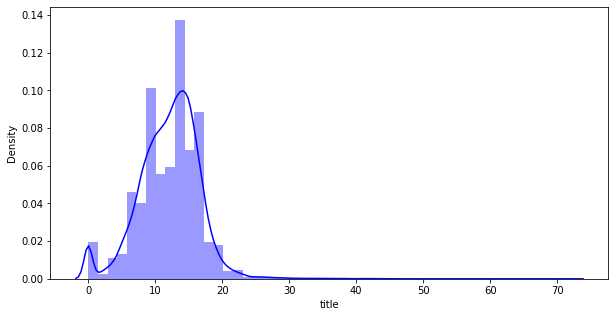

In [ ]:
title_count = df.title.apply(lambda x: count(x))
fig = plt.figure(figsize=(10,5))
sns.distplot(title_count, color='blue')
plt.show()

most of the tilte lengths are between 1-20 and we can see some of the tile length with 0 value as well indicating null values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


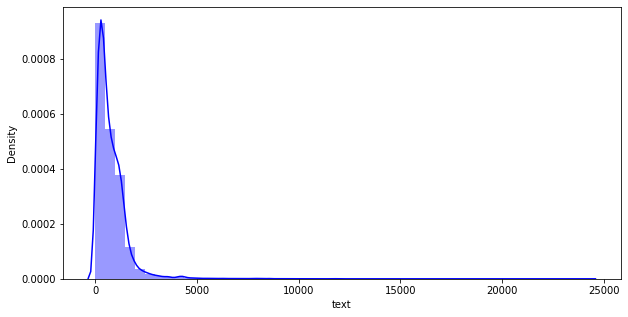

In [ ]:
text_count = df.text.apply(lambda x: count(x))
fig = plt.figure(figsize=(10,5))
sns.distplot(text_count, color='blue')
plt.show()

most of the text lengths are between 1-2000 and we can see some of the outliers present there as well

In [ ]:
# calculating the percentiles
for i in range(90,101):
    print(f'{i}st percentile :- ',np.percentile(text_count, i))

90st percentile :-  1464.0
91st percentile :-  1509.0
92st percentile :-  1570.0
93st percentile :-  1642.0699999999997
94st percentile :-  1741.0
95st percentile :-  1871.0
96st percentile :-  2042.0400000000009
97st percentile :-  2344.0599999999977
98st percentile :-  2824.0800000000017
99st percentile :-  4044.049999999992
100st percentile :-  24234.0


we can see that the 99 percentile value is 4044 and 100 percenitle value is 24234 which is quite high. So again zooming into 99 to 100 percentile region

In [ ]:
for i in np.arange(0,1.1,0.1):
    print(f'{99+i}st percentile :-',np.percentile(text_count, 99 + i))

99.0st percentile :- 4044.049999999992
99.1st percentile :- 4162.944000000018
99.2st percentile :- 4267.256000000001
99.3st percentile :- 4385.8139999999985
99.4st percentile :- 4590.768000000055
99.5st percentile :- 4921.19500000004
99.6st percentile :- 5483.608
99.7st percentile :- 6226.662999999982
99.8st percentile :- 7692.883999999925
99.9st percentile :- 8922.5070000001
100.0st percentile :- 24234.0


the 99 percentile is 8923. so its better to keep the thresold at 99 percentile value which is 8922 as the 100th percentile value seems to be outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


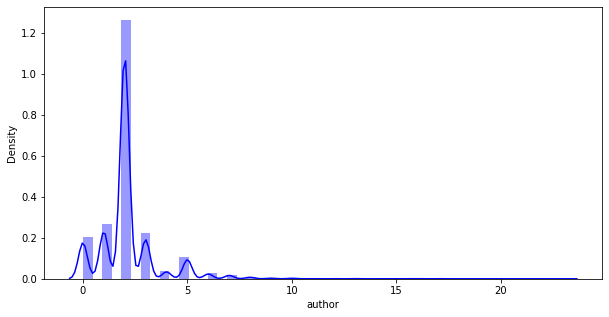

In [ ]:
author_count = df.author.apply(lambda x: count(x))
fig = plt.figure(figsize=(10,5))
sns.distplot(author_count, color='blue')
plt.show()

it seems like the author with the word count value of 3 is found quite often but there are author with word count value above 10 as well


In [ ]:
text = ''
for i in df.loc[df['label'] == 1,'text'].values:            # concatenating the unreliable text
    text += ' ' + str(i)

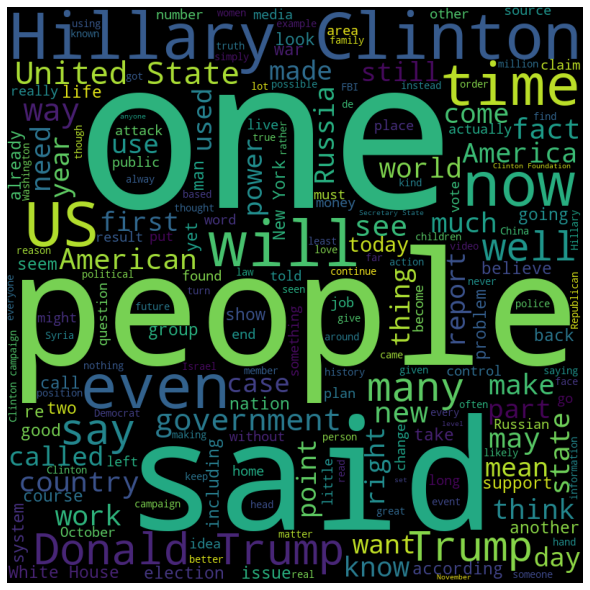

In [ ]:
# reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(str(text))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)                
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

these are the word that are used to spread fake news

In [ ]:
text = ''
for i in df.loc[df['label'] == 0,'text'].values:       # concatenation of text with reliable text
    text += ' ' + str(i)

In [ ]:
# reference: https://www.geeksforgeeks.org/generating-word-cloud-python/

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(str(text))
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)                
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

<br><br><br>

# Preprocessing

In [ ]:
df = pd.read_csv('train.csv',index_col = 'id')
df.head()

,title,author,text,label,title_len,text_len,concat_title_text,concat_title_author
id,,,,,,,,
0,house dem aide even see comey letter jason cha...,darrell lucus,house dem aide even see comey letter jason cha...,1,444,444,house dem aide even see comey letter jason cha...,house dem aide even see comey letter jason cha...
1,ever get feeling life circle roundabout rather...,daniel j flynn,ever get feeling life circle roundabout rather...,0,381,381,ever get feeling life circle roundabout rather...,ever get feeling life circle roundabout rather...
2,truth might get fired october 29 2016 tension ...,consortiumnews com,truth might get fired october 29 2016 tension ...,1,710,710,truth might get fired october 29 2016 tension ...,truth might get fired october 29 2016 tension ...
3,video 15 civilian killed single u airstrike id...,jessica purkiss,video 15 civilian killed single u airstrike id...,1,321,321,video 15 civilian killed single u airstrike id...,video 15 civilian killed single u airstrike id...
4,print iranian woman sentenced six year prison ...,howard portnoy,print iranian woman sentenced six year prison ...,1,89,89,print iranian woman sentenced six year prison ...,print iranian woman sentenced six year prison ...


In [ ]:
# filling the nan text with first 20 words of title feature
df['text'] = df.text.progress_apply(lambda x: np.nan if x == ' ' else x)
df.loc[df['text'].isna(), 'text'] = df.loc[df['text'].isna(), 'title']

100%|██████████| 20800/20800 [00:00<00:00, 326180.43it/s]


In [ ]:
# filling the nan title with first 20 words of text feature
df['title'] = df.text.progress_apply(lambda x: np.nan if x == ' ' else x)
df.loc[df['title'].isna(), 'title'] = df.loc[df['title'].isna(), 'text'].progress_apply(lambda x: ' '.join(x.split()[:20]))

100%|██████████| 20800/20800 [00:00<00:00, 314045.49it/s]
0it [00:00, ?it/s]


In [ ]:
df.author.fillna('unk_author',inplace=True)

In [ ]:
# reference: https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python

import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [ ]:
ps = WordNetLemmatizer()
def preprocess(text):
  try:
    x = decontracted(text)
    x = re.sub('[^a-zA-Z0-9]', ' ', x)
    x = x.lower()
    x = x.split()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    x = [ps.lemmatize(word) for word in x if word not in all_stopwords]
    x = ' '.join(x)
    return x
  except:
    return np.NaN

In [ ]:
df['text'] = df.text.progress_apply(lambda x: preprocess(x))
print('preprocessing of text done!')
print('-' * 100)
print()
df['title'] = df.title.progress_apply(lambda x: preprocess(x))
print('preprocessing of title done!')
print('-' * 100)
print()
df['author'] = df.author.progress_apply(lambda x: preprocess(x))
print('preprocessing of author done!')

100%|██████████| 20800/20800 [01:45<00:00, 196.31it/s]


preprocessing of text done!
----------------------------------------------------------------------------------------------------



100%|██████████| 20800/20800 [01:37<00:00, 213.05it/s]


preprocessing of title done!
----------------------------------------------------------------------------------------------------



100%|██████████| 20800/20800 [00:04<00:00, 4536.42it/s]

preprocessing of author done!


In [ ]:
df.iloc[[82,142, 169]]['text']

id
82                               huma weiner dog hillary
142    gorafi magazine entretien exclusif avec barack...
169    mohamad khweis another virginia man palestinia...
Name: text, dtype: object

<br><br><br>

# Feature Engineering

In [ ]:
# Calculating the word count of title feature
df['title_len'] = df.title.progress_apply(lambda x: len(x.split()))

100%|██████████| 20800/20800 [00:00<00:00, 38965.84it/s]


In [ ]:
# calculating the word count of text feature
df['text_len'] = df.text.progress_apply(lambda x:len(x.split()))

100%|██████████| 20800/20800 [00:00<00:00, 37874.06it/s]


In [ ]:
df['concat_title_text'] = df[['title','text']].progress_apply(lambda x: str(x[0]) + ' ' + str(x[1]),axis=1)

100%|██████████| 20800/20800 [00:00<00:00, 48468.21it/s]


In [ ]:
df['concat_title_author'] = df[['title', 'author']].progress_apply(lambda x: x[0] + ' ' + x[1],axis=1)

100%|██████████| 20800/20800 [00:00<00:00, 54645.42it/s]


In [ ]:
df.to_csv('/content/drive/MyDrive/fake_news/df_preprocessed', index=False)